# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

# Question 1. 
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

In [1]:
# Import libraries
import pandas as pd

# Read the csv and convert to DataFrame
airbnb_data = pd.read_csv("data/airbnb_hw.csv")
airbnb_df = pd.DataFrame(airbnb_data)

# The "Price" values turn to strings for values greater than 999 with a comma to separate the last three numerical digits
# Remove commas and turn strings to numeric values
airbnb_df["Price"] = pd.to_numeric(airbnb_df["Price"].str.replace(",", ""), errors="coerce")

# Sort price in descending order and reset index of values according to this
airbnb_price_sorted = airbnb_df.sort_values(by = "Price", ascending = False).reset_index(drop = True)
airbnb_price_sorted.head(20)

# Find the sum of missing_values
missing_price_values = airbnb_data["Price"].isna().sum()

# Print num of missing values & First 5 values in "Price" Column
print('Number of missing values in "Price":', missing_price_values)
print(airbnb_price_sorted[["Price"]].head(5))


Number of missing values in "Price": 0
   Price
0  10000
1   8000
2   6500
3   5999
4   5000


2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 

In [2]:
# Read the csv and convert to DataFrame
mn_police_data = pd.read_csv("data/mn_police_use_of_force.csv")
mn_df = pd.DataFrame(mn_police_data)

# Changing all na values in "subject_injury" to "Unkown"
mn_df["subject_injury"] = mn_df["subject_injury"].fillna("Unknown")

# Calculate the total numbers of "Unknown", "Yes", and "No" in "subject_injury"
unknown_count = (mn_df["subject_injury"] == "Unknown").sum()
no_count = (mn_df["subject_injury"] == "No").sum()
yes_count = (mn_df["subject_injury"] == "Yes").sum()

# Find the proportion of missing values from "subject_injury"
missing_values_prop = unknown_count/(unknown_count + no_count + yes_count)
print('Proportion of values that are missing from "subject_injury" variable:', missing_values_prop.round(3))
# This value of 0.762 is very concerning as over 3/4 of the values are unknown as whether a person was injured or not by police

Proportion of values that are missing from "subject_injury" variable: 0.762


In [3]:
# Cross tabulate "subject_injury" and "force" type
cross_tab_subject_injury_force_type = pd.crosstab(mn_df["subject_injury"], mn_df["force_type"])
display(cross_tab_subject_injury_force_type)

# Oftentimes for use of less-severe force, "subject_injury" is "Unknown" whereas more severe force types don't show as many "Unknown" records. There could be possible reporting bias done by the police officers or they may not be required by the pd to report this. 

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Unknown,2,7051,1421,0,27,74,87,0,170,31,985
Yes,2,1286,41,0,44,40,0,2,0,44,172


3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.

In [4]:
# Load the Parquet justice_data file and convert to df
justice_data = pd.read_parquet("data/justice_data.parquet")
justice_data_df = pd.DataFrame(justice_data)

# Clean "WhetherDefendantWasReleasedPretrial" variable replacing 1 for "Released", 0 for "Not Released", 9 for "Unknown" and missing values with "np.nan"
# There were no missing values as only 0,1, and 9 were unique values
print(justice_data_df["WhetherDefendantWasReleasedPretrial"].unique())

justice_data_df["WhetherDefendantWasReleasedPretrial"] = justice_data_df["WhetherDefendantWasReleasedPretrial"].replace({1: "Released", 0: "Not Released", 9 : "Unknown", "" : "np.nan"})
justice_data_df["WhetherDefendantWasReleasedPretrial"] = justice_data_df["WhetherDefendantWasReleasedPretrial"].replace("", "np.nan")

print(justice_data_df["WhetherDefendantWasReleasedPretrial"].value_counts())





[9 0 1]
WhetherDefendantWasReleasedPretrial
Released        19154
Not Released     3801
Unknown            31
Name: count, dtype: int64


4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [5]:
# Changed the "ImposedSentenceAllChargeInContactEvent" to numeric from object, rounded all float values to closest numeric value, and changed the type to int
justice_data_df["ImposedSentenceAllChargeInContactEvent"] = pd.to_numeric(justice_data_df["ImposedSentenceAllChargeInContactEvent"], errors = "coerce").round().astype("Int64")

# Filled in all NA values with 0
justice_data_df["ImposedSentenceAllChargeInContactEvent"] = justice_data_df["ImposedSentenceAllChargeInContactEvent"].fillna(0)

print(justice_data_df["ImposedSentenceAllChargeInContactEvent"].head(10))

0     0
1    60
2    12
3     1
4     0
5    12
6    36
7     6
8    24
9    12
Name: ImposedSentenceAllChargeInContactEvent, dtype: Int64


# Q2.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.

In [6]:
# pip install openpyxl xlrd

In [7]:
# Read the xls and convert to DataFrame
sharks_data = pd.read_excel("data/shark_attacks.xls")
sharks_df = pd.DataFrame(sharks_data)
print(sharks_df.shape)

(6992, 23)


2. Drop any columns that do not contain data.

In [8]:
sharks_df = sharks_df.drop(columns=["pdf", "href formula", "href", "Case Number", "Case Number.1", "original order", "Unnamed: 21", "Unnamed: 22"])

sharks_df.head(5)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,Minor bite to lower body,N,1711hrs,Not stated,Bob Myatt GSAF
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,None - chunk of surfboard bitten out,N,1600hrs,Bronze whaler,Bob Myatt GSAF
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,Bitten on the arm,N,1340hrs,Not stated,Kevin McMurray Trackingsharks.com
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,Severe arm injury and delay in medical treatme...,Y,1615hr,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,Body not recovered,Y,1710hr,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...


3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?

In [19]:
sharks_df["Year"] = pd.to_numeric(sharks_df["Year"]).dropna().round().astype(int)

# Filter rows to focus on attacks only since 1940
sharks_df = sharks_df[sharks_df["Year"] >= 1940]

# Group attacks by year
attacks_per_year = sharks_df.groupby("Year").size()

print(attacks_per_year.head())
print(attacks_per_year.tail())
# The attacks seem to be increasing since 1940 from the 20s-30s to the 100s in recent years. 

Year
1940    24
1941    27
1942    41
1943    28
1944    31
dtype: int64
Year
2022     98
2023    109
2024     49
2025      6
2026      1
dtype: int64


4. Clean the Age variable and make a histogram of the ages of the victims.

<Axes: xlabel='Age', ylabel='Count'>

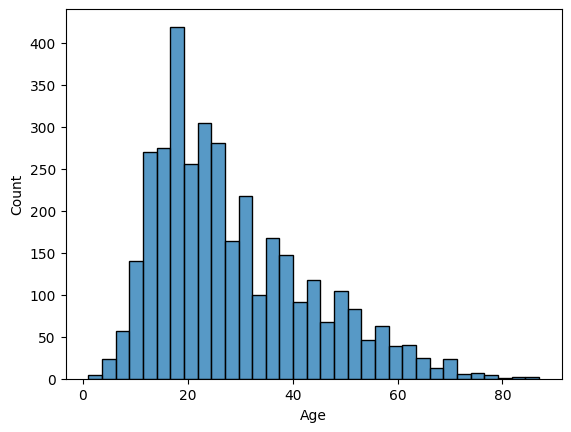

In [10]:
import matplotlib as plt 
import seaborn as sns
import numpy as np

sharks_df["Age"] = pd.to_numeric(sharks_df["Age"], errors="coerce").dropna().astype(int)

sns.histplot(sharks_df["Age"])

5. What proportion of victims are male?

In [11]:
sharks_df["Sex"] = sharks_df["Sex"].replace({
    "lli": np.nan, 
    "M x 2": "M", 
    " M": "M", 
    "M ": "M"
    })

print(sharks_df["Sex"].value_counts())

M = (sharks_df["Sex"] == "M").sum()
F = (sharks_df["Sex"] == "F").sum()
print("Proportion of Male Victims:", M/(M+F))


Sex
M    4299
F     706
Name: count, dtype: int64
Proportion of Male Victims: 0.858941058941059


6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?

In [12]:
sharks_df["Type"] = sharks_df["Type"] = sharks_df["Type"].replace({
    " Provoked": "Provoked", 
    "Questionable": "Unknown",
    "?": "Unknown",
    "Unconfirmed": "Unknown",
    "Unverified": "Unknown",
    "Invalid": "Unknown",
    "Under investigation": "Unknown",
    "Boat": "Unknown",
    "Watercraft": "Unknown",
    "Sea Disaster": "Unknown"
}).fillna("Unknown")
sharks_df["Type"].unique()

Unprovoked = (sharks_df["Type"] == "Unprovoked").sum()
Provoked = (sharks_df["Type"] == "Provoked").sum()
Unknown = (sharks_df["Type"] == "Unknown").sum()

Unprovoked_Proportion = Unprovoked/(Unprovoked+Provoked+Unknown)
print("Unprovoked Proportion:", Unprovoked_Proportion)

Unprovoked Proportion: 0.7429461341150605


7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.

In [13]:
sharks_df["Fatal Y/N"].unique()

array(['N', 'Y', 'F', 'M', nan, 'n', 'Nq', 'UNKNOWN', 2017, 'Y x 2', ' N'],
      dtype=object)

In [14]:

sharks_df["Fatal Y/N"] = sharks_df["Fatal Y/N"].replace({
    "F": "Unknown",
    "M": "Unknown",
    "n": "N",
    "Nq": "N",
    "UNKNOWN": "Unknown",
    2017: "Unknown",
    "Y x 2" : "Y",
    " N" : "N"
 }).fillna("Unknown")

8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?

In [15]:
cross_tab_type_sex = pd.crosstab(sharks_df["Type"], sharks_df["Sex"])
display(cross_tab_type_sex)

# Sum all Female attack cases
total_female_attacks = cross_tab_type_sex["F"].sum()

# Get the number of Unprovoked Female attacks
unprovoked_female_attacks = cross_tab_type_sex.loc["Unprovoked", "F"]

# Compute the proportion
prob_female_unprovoked = unprovoked_female_attacks / total_female_attacks

# Print result
print("Total Female Attacks:", total_female_attacks)
print("Unprovoked Female Attacks:", unprovoked_female_attacks)
print("Proportion of Unprovoked Female Attacks:", prob_female_unprovoked)

# Sum all Male attack cases
total_male_attacks = cross_tab_type_sex["M"].sum()

# Get the number of Unprovoked Female attacks
unprovoked_male_attacks = cross_tab_type_sex.loc["Unprovoked", "M"]

# Compute the proportion
prob_male_unprovoked = unprovoked_male_attacks / total_male_attacks

# Print result
print("Total Male Attacks:", total_male_attacks)
print("Unprovoked Male Attacks:", unprovoked_male_attacks)
print("Proportion of Unprovoked Male Attacks:", prob_male_unprovoked)

# Although shark attacks are more frequent among men, the conditional probability of an attack being unprovoked is higher for women than men.

Sex,F,M
Type,,
Provoked,28,446
Unknown,78,540
Unprovoked,600,3313


Total Female Attacks: 706
Unprovoked Female Attacks: 600
Proportion of Unprovoked Female Attacks: 0.8498583569405099
Total Male Attacks: 4299
Unprovoked Male Attacks: 3313
Proportion of Unprovoked Male Attacks: 0.7706443358920679


In [24]:
cross_tab_type_fatal = pd.crosstab(sharks_df["Type"], sharks_df["Fatal Y/N"])
display(cross_tab_type_fatal)

# Sum all Fatal attack cases
total_fatal_attacks = cross_tab_type_fatal["Y"].sum()

# Get the number of Unprovoked Fatal attacks
unprovoked_fatal_attacks = cross_tab_type_fatal.loc["Unprovoked", "Y"]

# Compute the proportion
prob_fatal_unprovoked = unprovoked_fatal_attacks / total_fatal_attacks

print("Total Fatal Attacks:", total_fatal_attacks)
print("Unprovoked Fatal Attacks:", unprovoked_fatal_attacks)
print("Proportion of Unprovoked Fatal Attacks:", prob_fatal_unprovoked)

# Get the number of Provoked Fatal attacks
provoked_fatal_attacks = cross_tab_type_fatal.loc["Provoked", "Y"]

# Compute the proportion
prob_fatal_provoked = provoked_fatal_attacks / total_fatal_attacks

print("Provoked Fatal Attacks:", provoked_fatal_attacks)
print("Proportion of Provoked Fatal Attacks:", prob_fatal_provoked)
# Attacks are more likely to be fatal when unprovoked.

Fatal Y/N,N,Unknown,Y
Type,,,
Provoked,496,9,13
Unknown,366,399,120
Unprovoked,3325,51,679


Total Fatal Attacks: 812
Unprovoked Fatal Attacks: 679
Proportion of Unprovoked Fatal Attacks: 0.8362068965517241
Provoked Fatal Attacks: 13
Proportion of Provoked Fatal Attacks: 0.01600985221674877


In [30]:
cross_tab_fatal_sex = pd.crosstab(sharks_df["Fatal Y/N"], sharks_df["Sex"])
display(cross_tab_fatal_sex)

# Sum all Fatal attack cases
total_fatal_attacks = cross_tab_fatal_sex.loc["Y"].sum()

# Get the number of Fatal Male attacks
fatal_male_attacks = cross_tab_fatal_sex.loc["Y", "M"]

# Compute the proportion
prob_fatal_male = fatal_male_attacks / total_fatal_attacks

print("Total Fatal Attacks:", total_fatal_attacks)
print("Fatal Male Attacks:", fatal_male_attacks)
print("Probability of Fatal Male Attacks:", prob_fatal_male)

# Get the number of Fatal Female attacks
fatal_female_attacks = cross_tab_fatal_sex.loc["Y", "F"]

# Compute the proportion
prob_fatal_female = fatal_female_attacks / total_fatal_attacks

print("Fatal Female Attacks:", fatal_female_attacks)
print("Probability of Fatal Male Attacks:", prob_fatal_female)

# Fatal attacks are more likely for female compared to male.

Sex,F,M
Fatal Y/N,,
N,561,3328
Unknown,58,322
Y,87,649


Total Fatal Attacks: 736
Fatal Male Attacks: 649
Probability of Fatal Male Attacks: 0.8817934782608695
Fatal Female Attacks: 87
Probability of Fatal Male Attacks: 0.11820652173913043


In [ ]:
# Based on this data and prior knowledge, I don't really like sharks as they seem fairly agressive no matter what. Considering that more unprovoked attacks are fatal, this makes me like them even less as they kill without warning.

9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [16]:
print(sharks_df.columns)  # Check available columns


Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source'],
      dtype='object')


In [17]:
# 9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

sharks_df.rename(columns={"Species ": "Species"}, inplace=True)

sharks_df["Species"] = sharks_df["Species"].astype(str).str.split().str.get(0)
sharks_df["Species"] = sharks_df["Species"].replace("white", "White")

cross_tab_species_type = pd.crosstab(sharks_df["Species"], sharks_df["Type"])
cross_tab_species_type["Total"] = cross_tab_species_type.sum(axis=1)
display(cross_tab_species_type)

white_shark_attacks = (sharks_df["Species"] == "White").sum() / cross_tab_species_type["Total"].sum()

print("Proportion of attacks from White Sharks:", white_shark_attacks)

Type,Provoked,Unknown,Unprovoked,Total
Species,,,,
"""A",2,0,5,7
"""Attacked",0,0,1,1
"""Blue",1,0,0,1
"""Dog",0,0,1,1
"""Reef",0,0,1,1
...,...,...,...,...
sandtiger,0,0,1,1
shark,0,1,1,2
small,1,0,18,19


Proportion of attacks from White Sharks: 0.08515323912644522


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
The most recent U.S. Census collected race data by asking people to identify their racial background. Individuals could select one or more races, including White, Black/African American, American Indian/Alaska Native, Asian, Native Hawaiian/Other Pacific Islander, or Some Other Race. Additionally, the Census asked a separate question about Hispanic, Latino, or Spanish origin, recognizing it as an ethnicity rather than a race.

2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
We gather this data to ensure fair representation in government and enforce laws. These data help communities receive certain funding or gain insight into demographic trends. Data quality matters because inaccurate data can lead to unfair distribution of resources and social inequality throughout the country.

3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
The Census did well in collecting data in a concise matter that grouped individuals into easy to understand categories. However, the Census could have done better by including more categories for individuals of specific races other than just grouping them into groups such as "Other Pacific Islander" or "Some Other Race". Including more groups could offer insight into the diversity of the population and help communities receive more accurate representation.

4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
The Census gathered data on sex and gender by asking individuals to identify as male or female and not providing options for other gender identities such as non-binary. The Census does not account for gender diversity and may result in individuals being underrepresented in the data. The census could improve by including questions such as assigned gender at birth and current gender identification to provide more inclusive and accurate data.

5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
With people having a diverse amount of races or gender identities, this could lead to problems with cleaning data as some individuals may not fit into the categories provided. Having people fill in their identity could lead to a lot of values that would be difficult to clean. Some may group individuals wrongly when cleaning data which could lead to inaccuracies.

6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?
An algorithm like this could lead to bias if it relies on discriminatory data which would misclassify individuals. Imputing values such as these could lead to privacy concerns as individuals should have control over how their identities are recorded. Such inaccuracies could lead to flawed funding or policy decisions. Such algorithms could lead to misuse and harm several underrepresented groups.